# Trabalho para a conclusão da disciplina de Análise Preditiva Avançada
## Autor: Rafael Machado##
Matricula: A57612198

#Instalação de bilbiotecas
pip install sklearn
pip install keras
pip install tensorflow
pip install matplotlib


In [2]:
import keras
from keras.datasets import mnist 
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import History
from keras.layers import Dropout
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot 
from sklearn.datasets import fetch_openml
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
digito= mnist.load_data()

Using TensorFlow backend.


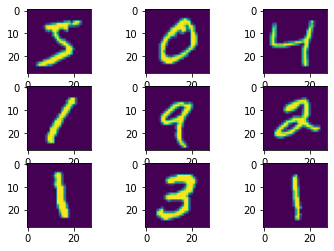

In [3]:
numero =tf.keras.datasets.mnist
(training_images, training_labels),(test_images,test_labels)=numero.load_data()
for i in range(9):
    pyplot.subplot(330+1+i)
    pyplot.imshow(training_images[i])

In [4]:
(x_treino,y_treino), (x_teste,y_teste) = mnist.load_data()

x_treino = x_treino.reshape(-1, 28,28, 1)
x_teste = x_teste.reshape(-1, 28,28, 1)

x_treino = x_treino.astype('float32')
x_teste = x_teste.astype('float32')

x_treino_norm = x_treino / 255
x_teste_norm = x_teste / 255

y_treino_cat = to_categorical(y_treino)
y_teste_cat = to_categorical(y_teste)


batch_size=64
epoch=3

In [5]:
x_treino.shape ,y_treino_cat.shape

((60000, 28, 28, 1), (60000, 10))

Modelo 

In [6]:
model = Sequential()
# 1 camada#
model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# 2 camada#
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# 3 camada#
model.add(Flatten())
model.add(Dense(64))
# 4 camada#
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
modelo =model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy']) 

Modelo Sem Normalização 

Epoch 1/3
60000/60000 [==============================] - 174s 3ms/step - loss: 0.6007 - accuracy: 0.9381
Epoch 2/3
60000/60000 [==============================] - 155s 3ms/step - loss: 0.0918 - accuracy: 0.9732
Epoch 3/3
10000/10000 [==============================] - 7s 710us/step
Test loss 0.061225679338564806
Test accuracy 0.9825000166893005
4


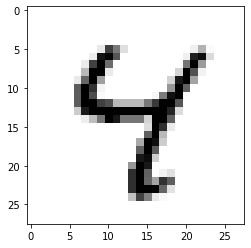

In [7]:
history= model.fit(x_treino, y_treino_cat, batch_size=batch_size, epochs=epoch)

test_loss, test_acc = model.evaluate(x_teste, y_teste_cat)
print('Test loss', test_loss)
print('Test accuracy', test_acc)
loss_semnormalizacao=test_loss
accurancy_semnormalizacao = test_acc 
predictions = model.predict(x_teste)

print(np.argmax(np.round(predictions[6])))

plt.imshow(x_teste[6].reshape(28, 28), cmap = plt.cm.binary)
plt.show()


Modelo Com Normalização


Epoch 1/3
60000/60000 [==============================] - 165s 3ms/step - loss: 0.2941 - accuracy: 0.9135
Epoch 2/3
60000/60000 [==============================] - 156s 3ms/step - loss: 0.0779 - accuracy: 0.9760
Epoch 3/3
10000/10000 [==============================] - 7s 721us/step
Test loss 0.05444407093534246
Test accuracy 0.9828000068664551
1


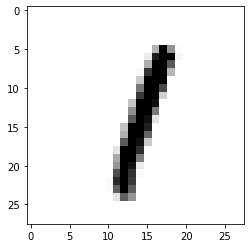

In [8]:
model.fit(x_treino_norm, y_treino_cat, batch_size=batch_size, epochs=epoch)

test_loss, test_acc = model.evaluate(x_teste_norm, y_teste_cat)
print('Test loss', test_loss)
print('Test accuracy', test_acc)
loss_comnormalizacao =test_loss 
accurancy_comnormalizacao =test_acc 
predictions = model.predict(x_teste)
print(np.argmax(np.round(predictions[5])))

plt.imshow(x_teste[5].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

Adicionando mais camadas ao modelo

In [9]:
model = Sequential()
# 8 camadas#

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
modelo =model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy']) 

Modelo com Mais camadas e sem normalizacao

Epoch 1/3
60000/60000 [==============================] - 149s 2ms/step - loss: 4.1181 - accuracy: 0.8932
Epoch 2/3
60000/60000 [==============================] - 146s 2ms/step - loss: 0.2120 - accuracy: 0.9551
Epoch 3/3
10000/10000 [==============================] - 7s 683us/step
Test loss 0.14821541282471734
Test accuracy 0.9629999995231628
9


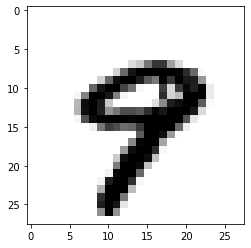

In [10]:
history= model.fit(x_treino, y_treino_cat, batch_size=batch_size, epochs=epoch)

test_loss, test_acc = model.evaluate(x_teste, y_teste_cat)
print('Test loss', test_loss)
print('Test accuracy', test_acc)
loss_semnormalizacao_mais_camadas=test_loss
accurancy_semnormalizacao_mais_camadas = test_acc 
predictions = model.predict(x_teste)

print(np.argmax(np.round(predictions[9])))

plt.imshow(x_teste[9].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

Modelo com Mais camadas e com normalizacao

Epoch 1/3
60000/60000 [==============================] - 149s 2ms/step - loss: 0.3081 - accuracy: 0.9362
Epoch 2/3
60000/60000 [==============================] - 151s 3ms/step - loss: 0.0672 - accuracy: 0.9800
Epoch 3/3
10000/10000 [==============================] - 7s 691us/step
Test loss 0.042743941813660785
Test accuracy 0.9864000082015991
0


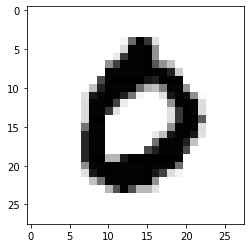

In [11]:
model.fit(x_treino_norm, y_treino_cat, batch_size=batch_size, epochs=epoch)

test_loss, test_acc = model.evaluate(x_teste_norm, y_teste_cat)
print('Test loss', test_loss)
print('Test accuracy', test_acc)
loss_comnormalizacao_mais_camadas =test_loss 
accurancy_comnormalizacao_mais_camadas =test_acc 
predictions = model.predict(x_teste)
print(np.argmax(np.round(predictions[3])))

plt.imshow(x_teste[3].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

In [12]:
a="%0.4f" % loss_semnormalizacao
b="%0.4f" % loss_comnormalizacao
c="%0.4f" % loss_semnormalizacao_mais_camadas
d="%0.4f" % loss_comnormalizacao_mais_camadas

semnormalizacao_pouca_camada="%0.4f" % accurancy_semnormalizacao
comnormalizacao_pouca_camada="%0.4f" % accurancy_comnormalizacao
semnormalizacao_mais_camada="%0.4f" % accurancy_semnormalizacao_mais_camadas
comnormalizacao_mais_camada="%0.4f" % accurancy_comnormalizacao_mais_camadas

In [13]:
print("Os resultados SEM normalização são ",(semnormalizacao_pouca_camada) ,"para precisão e",(a) ,"para perda" )
print("Os resultados COM normalização são ",(comnormalizacao_pouca_camada) ,"para precisão e",(b) ,"para perda" )
print("Os resultados SEM normalização e mais camadas são ",(semnormalizacao_mais_camada) ,"para precisão e",(c) ,"para perda" )
print("Os resultados COM normalização e mais camadas são ",(comnormalizacao_mais_camada) ,"para precisão e",(d) ,"para perda" )

Os resultados SEM normalização são  0.9825 para precisão e 0.0612 para perda
Os resultados COM normalização são  0.9828 para precisão e 0.0544 para perda
Os resultados SEM normalização e mais camadas são  0.9630 para precisão e 0.1482 para perda
Os resultados COM normalização e mais camadas são  0.9864 para precisão e 0.0427 para perda


Portanto é melhor mais camadas com resultados normalizados.

Analise com Random Forest

In [ ]:
mnist = fetch_openml('MNIST_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8)

In [ ]:
x, y = mnist["data"], mnist["target"]
x.shape, y.shape
split_index = 60000
x_treinorf, x_testerf = x[:split_index], x[split_index:]
y_treinorf, y_testerf = y[:split_index], y[split_index:]
x_treinorf.shape, y_treinorf.shape, x_testerf.shape, y_testerf.shape

In [ ]:
forest = RandomForestClassifier(random_state=50, n_estimators = 10)

In [ ]:
forest.fit(x_treinorf, y_treinorf)

In [ ]:
y_pred = forest.predict(x_testerf)
accuracy_score(y_testerf, y_pred)

In [ ]:
forest_hp_tuning=RandomForestClassifier(random_state=50, n_estimators = 10)
forest_hp_tuning.get_params()

In [ ]:
parameters = {'n_estimators':[5,25,125,250],
              'bootstrap':[False, True],
              'min_samples_split':[2,4,8,16],
              'max_depth':[10,100,1000,None]}
clf = RandomizedSearchCV(forest_hp_tuning, param_distributions=parameters,
                                n_iter=1, cv=2, scoring='accuracy', random_state=50)

In [ ]:
clf.fit(x_treinorf, y_treinorf)

In [ ]:
cvres = clf.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)
    rfr=mean_score
    randomforest_result=str(rfr)

Escolhendo o Melhor modelo

In [ ]:
lista=(randomforest_result,semnormalizacao_pouca_camada,comnormalizacao_pouca_camada,semnormalizacao_mais_camada,comnormalizacao_mais_camada)
maximo=max(lista)
print("O melhor resultado obtido foi de ",maximo, "para acuracidade")

In [ ]:
valor = maximo
pos = -1
for i in range(len(lista)-1,-1,-1):
    if lista[i] == valor:
     pos = i+1
if pos==5:
   resposta='comnormalizacao_mais_camada'
elif pos==4:
    resposta='semnormalizacao_mais_camada'
elif pos==3:
    resposta='comnormalizacao_pouca_camada'
elif pos==2:
    resposta='semnormalizacao_pouca_camada'
elif pos==1:
    resposta='randomforest_result'
print('O melhor modelo foi o :',resposta)
print('Sua acuracidade foi de  :',maximo)